# Roches Point Weather
***

### 1. Data Analysis
This is data analysis for Roches Point wind speed record using Pandas Dataframe.

Importing Libraries

In [37]:
# Python libraries

import pandas as pd
import datetime
import numpy as np
import seaborn as sns

Loading Data

In [38]:
# Load data and skip the first 17 rows.
df = pd.read_csv(r"C:\Users\phumi\OneDrive\Documents\hly1075\Roches Point Weather.csv", skiprows=17, low_memory=False)
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir
0,01-dec-1955 01:00,0,0.0,0,10.7,0,10.0,9.4,11.8,91,1002.1,1,16,1,170
1,01-dec-1955 02:00,0,2.9,0,9.8,0,9.7,10.0,12.0,99,1001.8,1,11,1,190
2,01-dec-1955 03:00,0,3.8,0,9.7,0,9.5,9.4,11.7,97,1001.7,1,9,1,160


Cleaning Data before analysis.

In [39]:
# Assign blank cells(" ") to NAN values.
df.replace(r"^\s*$", np.nan, regex=True, inplace=True)

In [40]:
# Check for missing data.
print(df.isna().sum())

date         0
ind          0
rain       330
ind.1        0
temp     18722
ind.2        0
wetb     26434
dewpt    26434
vappr    49543
rhum     49540
msl      32806
ind.3        0
wdsp       333
ind.4        0
wddir      575
dtype: int64


Dropping NULL values.

In [ ]:
# Drop null values.
df.dropna(inplace = True)


In [44]:
# Check for missing data.
print(df.isna().sum())

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
dtype: int64


Our data has no more missing value.

Changing 'date' column to 'datetime' type.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas-to-datetime

In [45]:
pd.to_datetime(df['date']).dt.strftime('%Y-%m-%dT%H:%M:%S')
df['date'] = pd.to_datetime(df['date'])
df['date']

C:\Users\phumi\AppData\Local\Temp\ipykernel_18488\4117001753.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['date']).dt.strftime('%Y-%m-%dT%H:%M:%S')
C:\Users\phumi\AppData\Local\Temp\ipykernel_18488\4117001753.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


0        1955-12-01 01:00:00
1        1955-12-01 02:00:00
2        1955-12-01 03:00:00
3        1955-12-01 04:00:00
4        1955-12-01 05:00:00
                 ...        
584826   2024-10-31 20:00:00
584827   2024-10-31 21:00:00
584828   2024-10-31 22:00:00
584829   2024-10-31 23:00:00
584830   2024-11-01 00:00:00
Name: date, Length: 528694, dtype: datetime64[ns]

Setting the index to the datetime.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html#pandas-datetimeindex

In [46]:
df.set_index('date', inplace=True)
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir
date,,,,,,,,,,,,,,
1955-12-01 01:00:00,0,0.0,0,10.7,0,10.0,9.4,11.8,91,1002.1,1,16,1,170
1955-12-01 02:00:00,0,2.9,0,9.8,0,9.7,10.0,12.0,99,1001.8,1,11,1,190
1955-12-01 03:00:00,0,3.8,0,9.7,0,9.5,9.4,11.7,97,1001.7,1,9,1,160


In [47]:
df.dtypes

ind       int64
rain     object
ind.1     int64
temp     object
ind.2     int64
wetb     object
dewpt    object
vappr    object
rhum     object
msl      object
ind.3     int64
wdsp     object
ind.4     int64
wddir    object
dtype: object

Converting windspeed to floats.

In [48]:
# Convert windspeed to floats
df['wdsp'] = df['wdsp'].astype(float)

Plotting

In [49]:
# Mean speed per year
dateFrom = "1955-12-01 01:00:00"
dateTo = "1955-12-01 01:00:00"
df.loc[dateFrom:dateTo]['wdsp'].mean()


16.0

In [51]:
df["wdsp"].resample("YE").mean()

date
1955-12-31    14.767160
1956-12-31    12.110997
1957-12-31    11.839155
1958-12-31    11.665297
1959-12-31    11.964612
                ...    
2020-12-31    13.123862
2021-12-31    11.782877
2022-12-31    12.417009
2023-12-31    12.360731
2024-12-31    12.411556
Freq: YE-DEC, Name: wdsp, Length: 70, dtype: float64

<Axes: xlabel='date', ylabel='wdsp'>

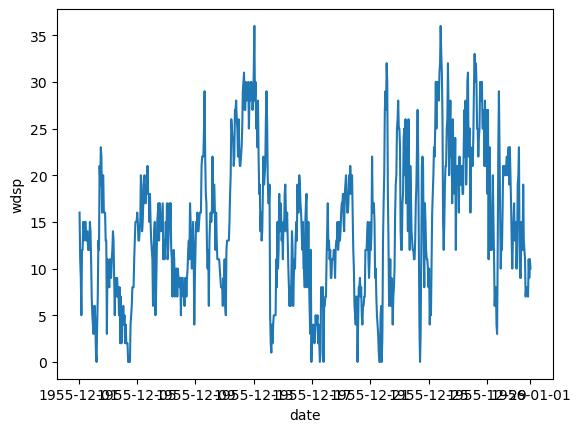

In [ ]:
# A chart for 1 year windspeed
dateFrom = "1955-12-01 01:00:00"
dateTo = "1955-12-01 01:00:00"
sns.lineplot(data=df.loc[dateFrom:dateTo], x="date", y='wdsp')

### End